FileNotFoundError: [Errno 2] No such file or directory: '/scratch/ssrivas9/MultiModalCL/dataset/cc_sbu_align/filter_cap.json'

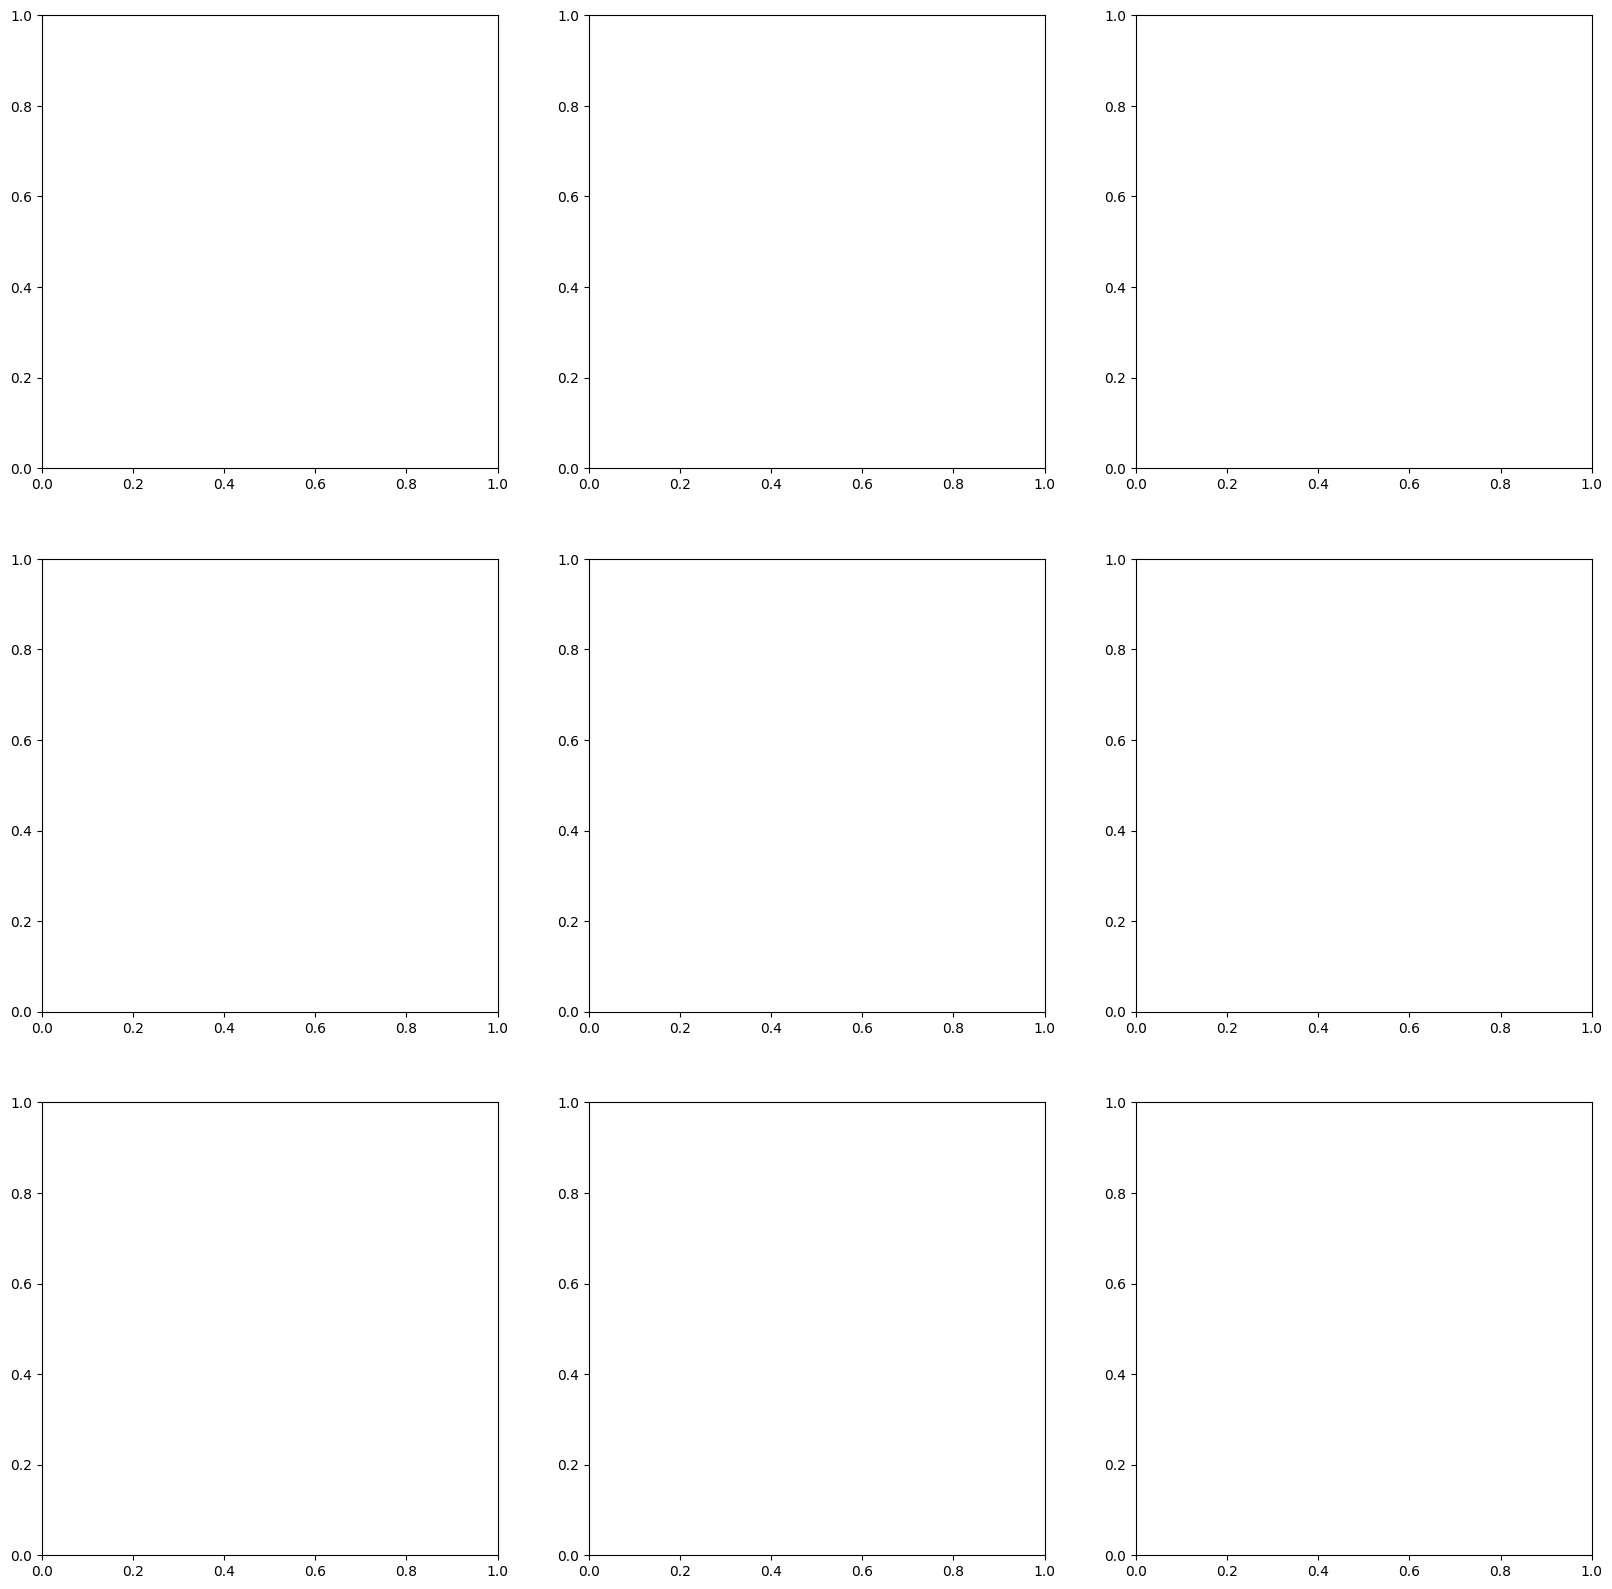

In [1]:
import ijson
import matplotlib.pyplot as plt
from PIL import Image
import os
import textwrap

# Function to load an image from a file path
def load_image(image_id):
    path = f'/scratch/ssrivas9/MultiModalCL/dataset/cc_sbu_align/image/{image_id}.jpg'
    try:
        img = Image.open(path)
        # Optionally, resize image to make the grid more uniform
        img = img.resize((100*2, 100*2))
        return img
    except Exception as e:
        print(f"Error loading image from {path}: {e}")
        # Return a blank image in case of error
        return Image.new('RGB', (100, 100), (255, 255, 255))

# Function to wrap text to a specified width
def wrap_text(text, width):
    return '\n'.join(textwrap.wrap(text, width=width))

# Path to the JSON file
json_file_path = '/scratch/ssrivas9/MultiModalCL/dataset/cc_sbu_align/filter_cap.json'

N = 3  # Dimension of the grid
fig, axs = plt.subplots(N, N, figsize=(20, 20))
axs = axs.flatten()  # Flatten the 2D array of axes for easy indexing

# Open the JSON file and read annotations in a streaming manner
with open(json_file_path, 'r') as file:
    annotations = ijson.items(file, 'annotations.item')
    
    for i, annotation in enumerate(annotations):
        if i >= N * N:
            break  # Stop after the first N * N items
        image_id = annotation['image_id']
        caption = annotation['caption']
        wrapped_caption = wrap_text(caption, width=40*2)  # Wrap the caption text
        img = load_image(image_id)  # Load and resize image from file path

        # Plot image
        axs[i].imshow(img)
        axs[i].axis('off')  # Hide axis
        axs[i].set_title(wrapped_caption, fontsize=8, wrap=True)  # Set wrapped caption as title

plt.tight_layout()
plt.show()
